In [17]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
#importing the dataset
df=pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [27]:
# extracting the x and y from the dataset
x = df.iloc[:,0:].values
y = df.iloc[:,-1].values
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [28]:
from sklearn.preprocessing import LabelEncoder
#smoker
labelencoder_smoker = LabelEncoder()
df.smoker = labelencoder_smoker.fit_transform(df.smoker)
#sex
labelencoder_sex = LabelEncoder()
df.sex = labelencoder_sex.fit_transform(df.sex)
#region
labelencoder_region = LabelEncoder()
df.region = labelencoder_region.fit_transform(df.region)
print(df)

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
x=pca.fit_transform(x)
print(pca.explained_variance_ratio_)
print(x)

[0.26908318]
[[ 0.86550954]
 [-1.13864807]
 [-0.7053086 ]
 ...
 [-1.31718035]
 [-1.58050269]
 [ 2.28660847]]


In [31]:
X = df.drop('charges',axis=1)
y = df['charges']
print(x)

[[ 0.86550954]
 [-1.13864807]
 [-0.7053086 ]
 ...
 [-1.31718035]
 [-1.58050269]
 [ 2.28660847]]


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 20)

In [33]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(n_estimators = 20, random_state = 0)
randomforest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

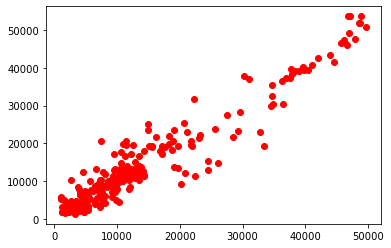

In [34]:
y_pred = randomforest.predict(x_test)
plt.scatter(y_test,y_pred,c='red')

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score
mse=metrics.mean_squared_error(y_test, y_pred)
print(mse) 
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(rmse)
r2= round(r2_score(y_test,y_pred), 2)
print(r2)

12681835.300016899
3561.1564554252454
0.92


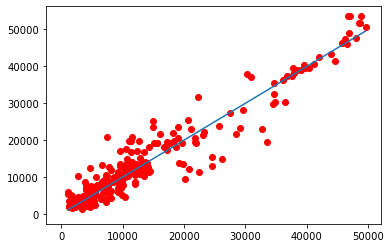

In [36]:
plt.scatter(y_test, y_pred, c='red')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],0.01)
plt.show()